In [2]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [4]:
filenames = os.listdir('C:\\Users\\lenovo\\Desktop\\Web App\\cats_dogs_cars\\cats_dogs_cars\\data')

categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'car': 
        categories.append(0)  #The categories are set as labels
    elif category == 'cat': 
        categories.append(1)
    elif category == 'dog':
        categories.append(2)
        
df = pd.DataFrame({
    'filename': filenames,  
    'category': categories,    
})

df


,filename,category
0,car.0.jpg,0
1,car.1.jpg,0
2,car.10.jpg,0
3,car.100.jpg,0
4,car.101.jpg,0
...,...,...
2995,dog.995.jpg,2
2996,dog.996.jpg,2
2997,dog.997.jpg,2
2998,dog.998.jpg,2


0    1000
1    1000
2    1000
Name: category, dtype: int64

 Total images:  3000


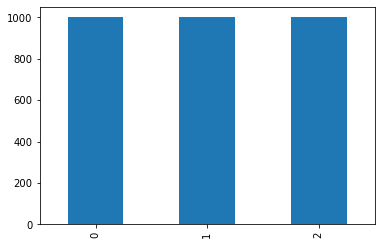

In [5]:
df['category'].value_counts().plot.bar()
print(df['category'].value_counts())

print("\n Total images: ", df.shape[0])

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model2 = Sequential()

model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(96, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(3, activation='softmax')) # 3 because we have car, dog and cat classes

model2.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 64)        0

In [7]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001) 
callbacks = [earlystop, learning_rate_reduction]

In [8]:
df["category"] = df["category"].replace({ 0: 'car', 1: 'cat', 2: 'dog' })

dog    824
cat    813
car    763
Name: category, dtype: int64

 Total train images:  2400


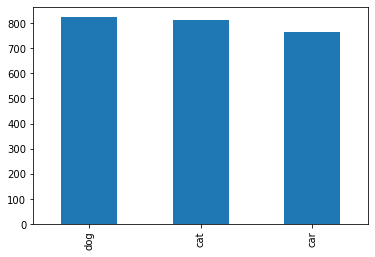

In [10]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=0) 

# Lets see total 'TRAIN' files and in each category
train_df = train_df.reset_index(drop=True)

train_df['category'].value_counts().plot.bar()
print(train_df['category'].value_counts())
print("\n Total train images: ", train_df.shape[0])

car    237
cat    187
dog    176
Name: category, dtype: int64

 Total validate images:  600


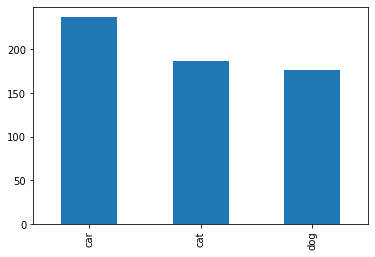

In [11]:
# Lets see total 'VALIDATE' files and in each category

validate_df = validate_df.reset_index(drop=True)
validate_df['category'].value_counts().plot.bar()

print(validate_df['category'].value_counts())
print("\n Total validate images: ", validate_df.shape[0])

In [12]:
total_train = train_df.shape[0]
print("Total train images:", total_train)

total_validate = validate_df.shape[0] 
print("Total validate images:", total_validate)

Total train images: 2400
Total validate images: 600


In [15]:
train_datagen = ImageDataGenerator(
                                    rotation_range=15,
                                    rescale=1./255,
                                    shear_range=0.1,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "C:\\Users\\lenovo\\Desktop\\Web App\\cats_dogs_cars\\cats_dogs_cars\\data\\", 
    x_col='filename',
    y_col='category',
    target_size=(150,150),
    class_mode='categorical',
    batch_size=32
)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "C:\\Users\\lenovo\\Desktop\\Web App\\cats_dogs_cars\\cats_dogs_cars\\data\\", 
    x_col='filename',
    y_col='category',
    target_size=(150,150),
    class_mode='categorical',
    batch_size=32
)

Found 2400 validated image filenames belonging to 3 classes.
Found 600 validated image filenames belonging to 3 classes.


In [16]:
epochs=50
batch_size=50

history = model2.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate/batch_size,
    steps_per_epoch=total_train/batch_size,
    callbacks=callbacks
)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6532\505187873.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model2.fit_generator(


Epoch 1/50
48/48 [==============================] - 82s 2s/step - loss: 1.6840 - accuracy: 0.3828 - val_loss: 0.9462 - val_accuracy: 0.5339 - lr: 0.0010
Epoch 2/50
48/48 [==============================] - 64s 1s/step - loss: 0.9089 - accuracy: 0.5254 - val_loss: 0.7275 - val_accuracy: 0.6719 - lr: 0.0010
Epoch 3/50
48/48 [==============================] - 60s 1s/step - loss: 0.7560 - accuracy: 0.6048 - val_loss: 0.6216 - val_accuracy: 0.7161 - lr: 0.0010
Epoch 4/50
48/48 [==============================] - 60s 1s/step - loss: 0.7166 - accuracy: 0.6257 - val_loss: 0.6426 - val_accuracy: 0.6927 - lr: 0.0010
Epoch 5/50
48/48 [==============================] - 60s 1s/step - loss: 0.6667 - accuracy: 0.6484 - val_loss: 0.5918 - val_accuracy: 0.7370 - lr: 0.0010
Epoch 6/50
48/48 [==============================] - 60s 1s/step - loss: 0.6577 - accuracy: 0.6393 - val_loss: 0.6967 - val_accuracy: 0.7109 - lr: 0.0010
Epoch 7/50
48/48 [==============================] - 62s 1s/step - loss: 0.6585 - a

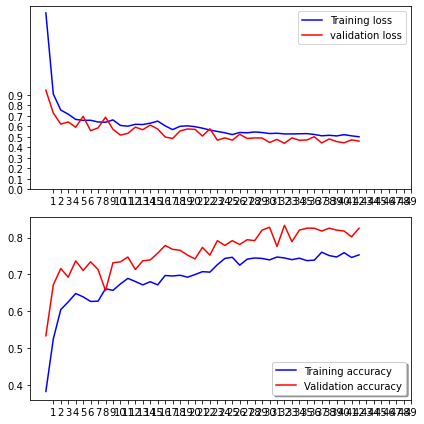

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,6))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
ax1.legend()

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))
ax2.legend()

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [19]:
model2.save('carcatdog.hdf5')

In [20]:
from keras import models    
model = models.load_model('carcatdog.hdf5', compile = False)

In [23]:
test_filenames = os.listdir("C:\\Users\\lenovo\\Desktop\\Web App\\cats_dogs_cars\\cats_dogs_cars\\test")
test_df = pd.DataFrame({
    'filename': test_filenames
})

In [24]:
total_test = test_df.shape[0]  
print("Total amount of test images are:", total_test)

Total amount of test images are: 150


In [25]:
test_datagen = ImageDataGenerator(rescale=1./255)
batch_size = 15

test_generator = test_datagen.flow_from_dataframe(
    test_df, 
    "C:\\Users\\lenovo\\Desktop\\Web App\\cats_dogs_cars\\cats_dogs_cars\\test",
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(150,150),
    batch_size=batch_size,
    shuffle=False 
)

Found 150 validated image filenames.


In [26]:
predict = model.predict_generator(test_generator, steps=np.ceil(total_test/batch_size))

# Get total predicteed images       

print("Number of predicted images:", len(predict), "\n")

# Get predictions in array
# These are labels 0, 1, 2 (category)
# Use [?:?] to specify range of index in list/array

print("    0:car          1:cat       2:dog \n\n", predict, "\n")   

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6532\3945738597.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(test_generator, steps=np.ceil(total_test/batch_size))


Number of predicted images: 150 

    0:car          1:cat       2:dog 

 [[4.20810934e-03 4.80428815e-01 5.15363157e-01]
 [4.64690311e-05 7.16051400e-01 2.83902168e-01]
 [1.09231479e-01 4.84588832e-01 4.06179667e-01]
 [9.99987245e-01 4.90932007e-06 7.91552611e-06]
 [6.76534593e-01 3.47639923e-03 3.19989055e-01]
 [9.99857426e-01 8.12487633e-05 6.13239317e-05]
 [3.39051918e-03 6.45531654e-01 3.51077855e-01]
 [1.14968354e-02 6.08766079e-01 3.79737049e-01]
 [1.72049776e-02 5.40640056e-01 4.42154884e-01]
 [9.98510540e-01 1.47995190e-04 1.34150637e-03]
 [1.99211538e-01 1.71144292e-01 6.29644215e-01]
 [7.38382587e-05 5.44877291e-01 4.55048889e-01]
 [6.05979112e-05 6.26384795e-01 3.73554498e-01]
 [1.00866798e-02 1.37514204e-01 8.52399111e-01]
 [1.46640977e-02 5.66171467e-01 4.19164419e-01]
 [3.48372967e-04 6.88957095e-01 3.10694516e-01]
 [1.08879845e-04 4.23524082e-01 5.76367021e-01]
 [5.28609529e-02 6.88324273e-01 2.58814812e-01]
 [1.81900134e-04 6.35006189e-01 3.64811987e-01]
 [2.35601561e-

In [27]:
test_df['category'] = np.argmax(predict, axis=-1) 

# Lets see the some predicted values for each category of images
# Use [?:?] to specify range 

print(test_df['category'][0:3]) 

0    2
1    1
2    1
Name: category, dtype: int64


In [28]:
print(train_generator.class_indices) 
print(validation_generator.class_indices, "\n")

# Map labels 
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
print(label_map, "\n")

# See the output of mapped labels
print(test_df['category'][0:4], "\n")

# Lets replace letters with words to see better
print(test_df['category'][0:3])

{'car': 0, 'cat': 1, 'dog': 2}
{'car': 0, 'cat': 1, 'dog': 2} 

{0: 'car', 1: 'cat', 2: 'dog'} 

0    dog
1    cat
2    cat
3    car
Name: category, dtype: object 

0    dog
1    cat
2    cat
Name: category, dtype: object
